<a href="https://colab.research.google.com/github/matcgoes/kaggle/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Dataset sourced by some unnamed institute.

Feature Explanation:

distancefromhome - the distance from home where the transaction happened.

distancefromlast_transaction - the distance from last transaction happened.

ratiotomedianpurchaseprice - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

usedpinnumber - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Estudos_DataScience/Provas/Exercicios e Resolucao das Provas/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.info()
#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Uma rápida olhada nos casos de fraude

In [ ]:
df.groupby(['repeat_retailer'], as_index=False)['fraud'].mean().sort_values(by='fraud', ascending=False)

,repeat_retailer,fraud
0,0.0,0.088449
1,1.0,0.087262


Não há tanta difereneça em Fraude se a compra foi feita na mesma loja/varejista

In [ ]:
df.groupby(['used_chip'], as_index=False)['fraud'].mean().sort_values(by='fraud', ascending=False)

,used_chip,fraud
0,0.0,0.100051
1,1.0,0.063956


Há um maior indice de fraudes em compras onde não há a utilização do Chip/Cartão Físico

In [ ]:
df.groupby(['used_pin_number'], as_index=False)['fraud'].mean().sort_values(by='fraud', ascending=False)

,used_pin_number,fraud
0,0.0,0.096877
1,1.0,0.002714


Há também um maior indice de fraude quando não é utilizado a senha na transação

In [ ]:
df.groupby(['online_order'], as_index=False)['fraud'].mean().sort_values(by='fraud', ascending=False)

,online_order,fraud
1,1.0,0.127140
0,0.0,0.013427


Ainda mais expressivo, a grande maioria dos casos de fraude ocorrem quando a transação é online

## Análise Visual

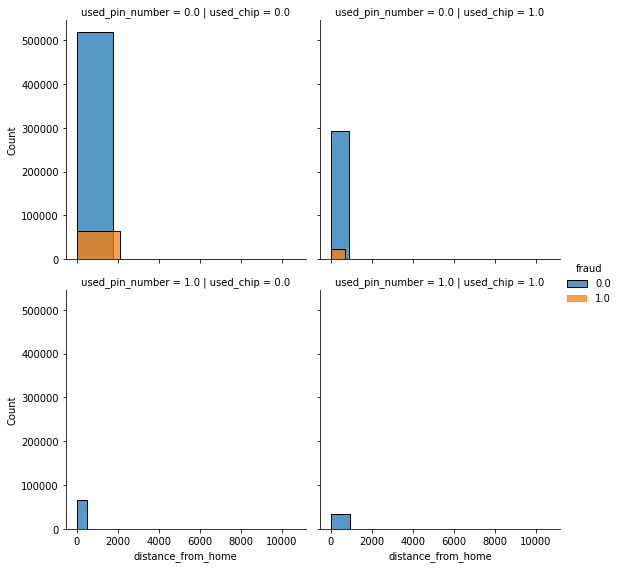

In [ ]:
g = sns.FacetGrid(df, col='used_chip', row='used_pin_number', hue='fraud', height=4)
g.map(sns.histplot,'distance_from_home', bins=5).add_legend()

plt.show()

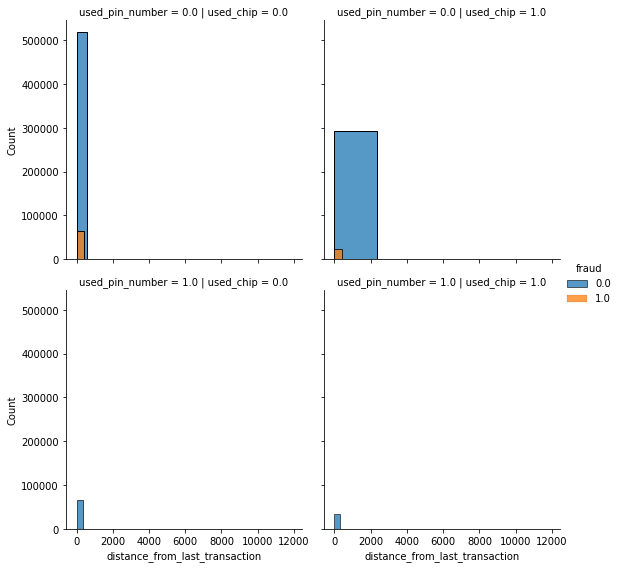

In [ ]:
g = sns.FacetGrid(df, col='used_chip', row='used_pin_number', hue='fraud', height=4)
g.map(sns.histplot,'distance_from_last_transaction', bins=5).add_legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


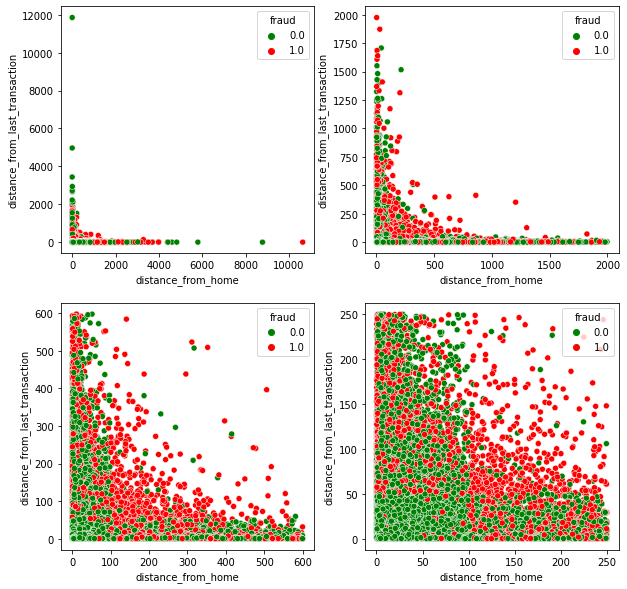

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))


filter1 = (df['distance_from_home'] < 2000) & (df['distance_from_last_transaction'] < 2000)
filter2 = (df['distance_from_home'] < 600) & (df['distance_from_last_transaction'] < 600)
filter3 = (df['distance_from_home'] < 250) & (df['distance_from_last_transaction'] < 250)

sns.scatterplot(x='distance_from_home',y='distance_from_last_transaction', hue='fraud', data=df, ax=axes[0,0], palette=['g', 'r'])
sns.scatterplot(x='distance_from_home',y='distance_from_last_transaction', hue='fraud', data=df[filter1], ax=axes[0,1], palette=['g', 'r'])
sns.scatterplot(x='distance_from_home',y='distance_from_last_transaction', hue='fraud', data=df[filter2], ax=axes[1,0], palette=['g', 'r'])
sns.scatterplot(x='distance_from_home',y='distance_from_last_transaction', hue='fraud', data=df[filter3], ax=axes[1,1], palette=['g', 'r'])

plt.show()

In [ ]:
df.loc[:,'distance_home_interval'] = 1 #all rows

df.loc[(df['distance_from_home'] < 100), 'distance_home_interval'] = 0
# df.loc[(df['distance_from_home'] >= 100) & (df['distance_from_home'] < 200), 'distance_home_interval'] = 1
# df.loc[(df['distance_from_home'] >= 200) & (df['distance_from_home'] <= 400), 'distance_home_interval'] = 2

In [ ]:
df.groupby(['distance_home_interval'], as_index=False)['fraud'].mean().sort_values(by='fraud', ascending=False)

,distance_home_interval,fraud
1,1,0.446022
0,0,0.068612


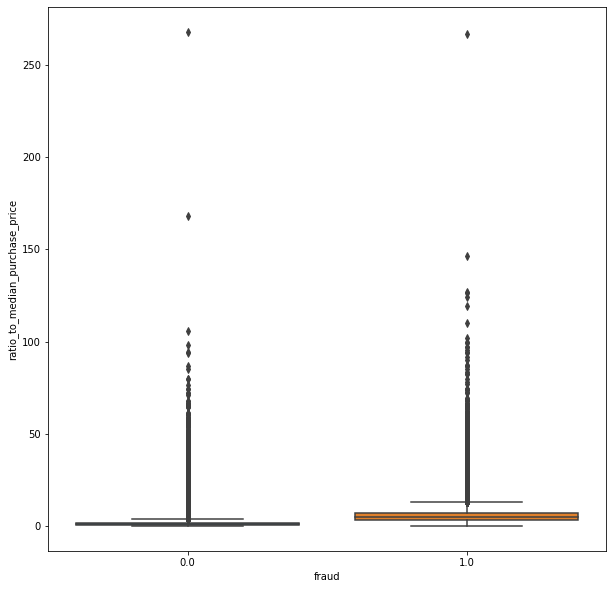

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='fraud', y='ratio_to_median_purchase_price', data=df)

In [ ]:
df['ratio_int'] = df['ratio_to_median_purchase_price'].apply(lambda x: int(x))
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,distance_home_interval,ratio_int
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,0,1
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,0,1
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,0,2


In [ ]:
df.loc[:, 'ratio_to_median_pp_band'] = 3

df.loc[( df['ratio_int'] < 1 ), 'ratio_to_median_pp_band'] = 0
df.loc[(df['ratio_int'] == 1), 'ratio_to_median_pp_band'] = 1
df.loc[(df['ratio_int'] >  1) & (df['ratio_int'] <= 2), 'ratio_to_median_pp_band'] = 2

In [ ]:
df.groupby(['ratio_to_median_pp_band'], as_index=False)['fraud'].mean().sort_values(by='fraud', ascending=False)

,ratio_to_median_pp_band,fraud
3,3,0.419632
0,0,0.025090
1,1,0.024849
2,2,0.024653


In [ ]:
df['Dist_Last_Transaction_Band'] = df['distance_from_last_transaction'].apply(lambda x: 0 if x < 400 else 1)
df.groupby(['Dist_Last_Transaction_Band'], as_index=False)['fraud'].mean().sort_values(by='fraud', ascending=False)

,Dist_Last_Transaction_Band,fraud
1,1,0.514874
0,0,0.087216


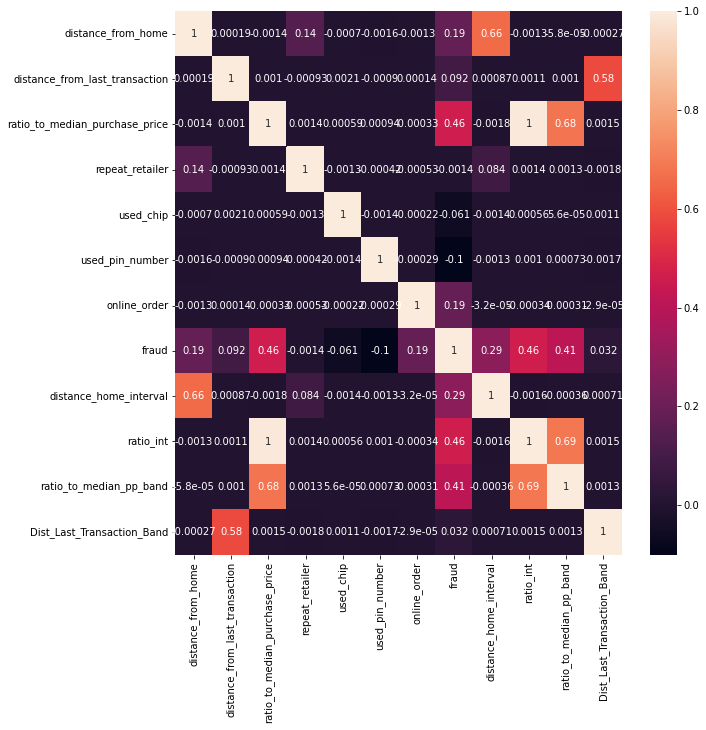

In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(data=df.corr(), annot=True)

plt.show()

In [ ]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud', 'distance_home_interval',
       'ratio_int', 'ratio_to_median_pp_band', 'Dist_Last_Transaction_Band'],
      dtype='object')

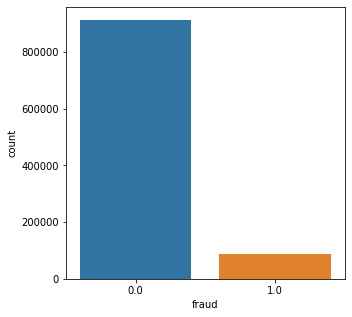

In [ ]:
plt.figure(figsize=(5,5))

sns.countplot(x='fraud', data=df)

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

X = df[['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order','distance_home_interval', 'ratio_to_median_pp_band', 'Dist_Last_Transaction_Band']].values
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
pr_lr = precision_score(y_test, y_pred)
auc_lr = roc_auc_score(y_test, y_pred)
gini_lr = 2*auc_lr - 1
scores_lr = cross_val_score(lr, X, y, cv=10)
mean_cv_lr = scores_lr.mean()
std_cv_lr = np.std(scores_lr)

In [ ]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

acc_d_tree = accuracy_score(y_test, y_pred)
pr_d_tree = precision_score(y_test, y_pred)
auc_d_tree = roc_auc_score(y_test, y_pred)
gini_d_tree = 2*auc_d_tree - 1
scores_d_tree = cross_val_score(d_tree, X, y, cv=10)
mean_cv_d_tree = scores_d_tree.mean()
std_cv_d_tree = np.std(scores_d_tree)

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred)
pr_nb = precision_score(y_test, y_pred)
auc_nb = roc_auc_score(y_test, y_pred)
gini_nb = 2*auc_nb - 1
scores_nb = cross_val_score(nb, X, y, cv=10)
mean_cv_nb = scores_nb.mean()
std_cv_nb = np.std(scores_nb)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred)
pr_rf = precision_score(y_test, y_pred)
auc_rf = roc_auc_score(y_test, y_pred)
gini_rf = 2*auc_rf - 1
scores_rf = cross_val_score(rf, X, y, cv=10)
mean_cv_rf = scores_nb.mean()
std_cv_rf = np.std(scores_rf)

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [acc_lr, acc_d_tree, acc_nb, acc_rf],
    'Precision': [pr_lr, pr_d_tree, pr_nb, pr_rf],
    'Gini': [gini_lr, gini_d_tree, gini_nb, gini_rf],
    'Mean CV': [mean_cv_lr, mean_cv_d_tree, mean_cv_nb, mean_cv_rf],
    'Std CV': [std_cv_lr, std_cv_d_tree, std_cv_nb, std_cv_rf ]})


models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Gini,Mean CV,Std CV
1,Decision Tree,0.962167,0.715716,0.905057,0.961435,0.000342
3,Random Forest,0.962167,0.715716,0.905057,0.929696,0.000342
2,Naive Bayes,0.939383,0.600909,0.854470,0.929696,0.000772
0,Logistic Regression,0.939290,0.672289,0.568040,0.938910,0.000367


In [ ]:
from sklearn import tree

plt.figure(figsize=(50,40))

_ = tree.plot_tree (d_tree, feature_names = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order','distance_home_interval', 'ratio_to_median_pp_band', 'Dist_Last_Transaction_Band'],
                    class_names = ['0', '1'],
                    filled=True)

In [ ]:
text_representation = tree.export_text(d_tree, feature_names=['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order','distance_home_interval', 'ratio_to_median_pp_band', 'Dist_Last_Transaction_Band'])
print(text_representation)

|--- ratio_to_median_pp_band <= 2.50
|   |--- distance_home_interval <= 0.50
|   |   |--- Dist_Last_Transaction_Band <= 0.50
|   |   |   |--- online_order <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- online_order >  0.50
|   |   |   |   |--- used_chip <= 0.50
|   |   |   |   |   |--- used_pin_number <= 0.50
|   |   |   |   |   |   |--- repeat_retailer <= 0.50
|   |   |   |   |   |   |   |--- ratio_to_median_pp_band <= 1.50
|   |   |   |   |   |   |   |   |--- ratio_to_median_pp_band <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- ratio_to_median_pp_band >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- ratio_to_median_pp_band >  1.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- repeat_retailer >  0.50
|   |   |   |   |   |   |   |--- ratio_to_median_pp_band <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- ratio_t

In [ ]:
confusion_matrix(y_test, y_pred)

array([[265900,   7879],
       [ 10598,  15623]])

In [ ]:
df_cv = pd.DataFrame(cross_validate(lr, X, y, cv=10, return_train_score=True, scoring=['accuracy', 'roc_auc','precision' ]))

In [ ]:
df_cv

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_precision,train_precision
0,8.031081,0.197199,0.93882,0.938920,0.960147,0.959910,0.667519,0.668713
1,9.826065,0.153296,0.93882,0.938920,0.960252,0.959899,0.664989,0.669002
2,5.295201,0.147989,0.93930,0.938867,0.958635,0.960077,0.671815,0.668237
3,4.967134,0.151176,0.93896,0.938904,0.961517,0.959760,0.668027,0.668656
4,5.855279,0.153411,0.93838,0.938961,0.959910,0.959954,0.663745,0.669070
5,4.854892,0.151481,0.93947,0.938848,0.959150,0.960021,0.674458,0.667951
6,6.881154,0.150573,0.93935,0.938861,0.960524,0.959868,0.670447,0.668386
7,6.160906,0.158964,0.93832,0.938976,0.959662,0.959965,0.665807,0.668901
8,5.703297,0.151798,0.93872,0.938931,0.959825,0.959946,0.667393,0.668727
9,5.694629,0.149859,0.93896,0.938904,0.959728,0.959957,0.671971,0.668225


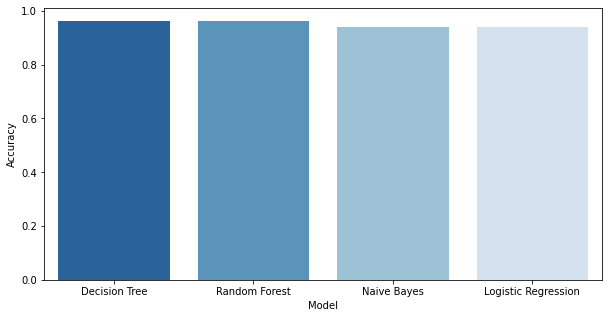

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data=models.sort_values(by='Accuracy', ascending=False), palette='Blues_r')

plt.show()

In [ ]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97    273779
         1.0       0.66      0.60      0.63     26221

    accuracy                           0.94    300000
   macro avg       0.81      0.78      0.80    300000
weighted avg       0.94      0.94      0.94    300000

